## REPORT 5:

### Name: Valeria Albarracín Garcés
### Code: 20191096

## 1) Code section

### 1.1 You have to replicate figure 3 of Acemoglu et al 2001 (the last paper we read). Describe the patterns you find

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np 
from statsmodels.iolib.summary2 import summary_col

In [27]:
url = "https://raw.githubusercontent.com/jesoto/1REI05/main/Reports/data/acemoglu_2001.csv"
BD = pd.read_csv(url)
BD

,longname,shortnam,logmort0,risk,loggdp,campaign,source0,slave,latitude,neoeuro,...,logmortjam,logmortcap250,logmortjam250,wandcafrica,malfal94,wacacontested,mortnaval2250,logmortnaval2250,mortnaval1250,logmortnaval1250
0,Bangladesh,BGD,4.268438,5.140000,6.880000,1,1,0,0.2667,0,...,4.268438,4.268438,4.268438,0,0.12008,0,71.410004,4.268438,71.410004,4.268438
1,Canada,CAN,2.778819,9.729999,9.990000,0,1,0,0.6667,1,...,2.778819,2.778819,2.778819,0,0.00000,0,16.100000,2.778819,16.100000,2.778819
2,Congo,COG,5.480639,4.680000,7.420000,0,1,1,0.0111,0,...,5.480639,5.480639,5.480639,1,0.95000,0,240.000000,5.480639,240.000000,5.480639
3,Algeria,DZA,4.359270,6.500000,8.390000,1,1,0,0.3111,0,...,4.359270,4.359270,4.359270,0,0.00000,0,78.199997,4.359270,78.199997,4.359270
4,Egypt,EGY,4.216562,6.770000,7.950000,1,1,0,0.3000,0,...,4.216562,4.216562,4.216562,0,0.00000,0,67.800003,4.216562,67.800003,4.216562
5,Ethiopia,ETH,3.258097,5.730000,6.110000,1,1,0,0.0889,0,...,3.258097,3.258097,3.258097,1,0.55100,0,26.000000,3.258097,26.000000,3.258097
6,Ghana,GHA,6.504288,6.270000,7.370000,1,1,0,0.0889,0,...,6.504288,5.521461,5.521461,1,0.95000,0,250.000000,5.521461,250.000000,5.521461
7,Gambia,GMB,7.293018,8.270001,7.270000,1,1,0,0.1476,0,...,7.293018,5.521461,5.521461,1,0.95000,0,250.000000,5.521461,250.000000,5.521461
8,Indonesia,IDN,5.135798,7.590000,7.330000,1,1,0,0.0556,0,...,5.135798,5.135798,5.135798,0,0.17873,0,170.000000,5.135798,170.000000,5.135798
9,India,IND,3.884241,8.270001,7.330000,0,1,0,0.2222,0,...,3.884241,3.884241,3.884241,0,0.23596,0,48.630001,3.884241,48.630001,3.884241


In [29]:
BD = BD.rename( columns = { "logmort0":'Log of Settler Mortality', "risk": 'Average Expropiation Risk 1985-95'})
BD

,longname,shortnam,Log of Settler Mortality,Average Expropiation Risk 1985-95,loggdp,campaign,source0,slave,latitude,neoeuro,...,logmortjam,logmortcap250,logmortjam250,wandcafrica,malfal94,wacacontested,mortnaval2250,logmortnaval2250,mortnaval1250,logmortnaval1250
0,Bangladesh,BGD,4.268438,5.140000,6.880000,1,1,0,0.2667,0,...,4.268438,4.268438,4.268438,0,0.12008,0,71.410004,4.268438,71.410004,4.268438
1,Canada,CAN,2.778819,9.729999,9.990000,0,1,0,0.6667,1,...,2.778819,2.778819,2.778819,0,0.00000,0,16.100000,2.778819,16.100000,2.778819
2,Congo,COG,5.480639,4.680000,7.420000,0,1,1,0.0111,0,...,5.480639,5.480639,5.480639,1,0.95000,0,240.000000,5.480639,240.000000,5.480639
3,Algeria,DZA,4.359270,6.500000,8.390000,1,1,0,0.3111,0,...,4.359270,4.359270,4.359270,0,0.00000,0,78.199997,4.359270,78.199997,4.359270
4,Egypt,EGY,4.216562,6.770000,7.950000,1,1,0,0.3000,0,...,4.216562,4.216562,4.216562,0,0.00000,0,67.800003,4.216562,67.800003,4.216562
5,Ethiopia,ETH,3.258097,5.730000,6.110000,1,1,0,0.0889,0,...,3.258097,3.258097,3.258097,1,0.55100,0,26.000000,3.258097,26.000000,3.258097
6,Ghana,GHA,6.504288,6.270000,7.370000,1,1,0,0.0889,0,...,6.504288,5.521461,5.521461,1,0.95000,0,250.000000,5.521461,250.000000,5.521461
7,Gambia,GMB,7.293018,8.270001,7.270000,1,1,0,0.1476,0,...,7.293018,5.521461,5.521461,1,0.95000,0,250.000000,5.521461,250.000000,5.521461
8,Indonesia,IDN,5.135798,7.590000,7.330000,1,1,0,0.0556,0,...,5.135798,5.135798,5.135798,0,0.17873,0,170.000000,5.135798,170.000000,5.135798
9,India,IND,3.884241,8.270001,7.330000,0,1,0,0.2222,0,...,3.884241,3.884241,3.884241,0,0.23596,0,48.630001,3.884241,48.630001,3.884241


In [77]:
annotations = BD["shortnam"]
annotations

0     BGD
1     CAN
2     COG
3     DZA
4     EGY
5     ETH
6     GHA
7     GMB
8     IDN
9     IND
10    JAM
11    KEN
12    LKA
13    MDG
14    MEX
15    MLI
16    MLT
17    MYS
18    NGA
19    NZL
20    SDN
21    SEN
22    SLE
23    TTO
24    TUN
25    USA
26    VNM
27    ZAF
Name: shortnam, dtype: object

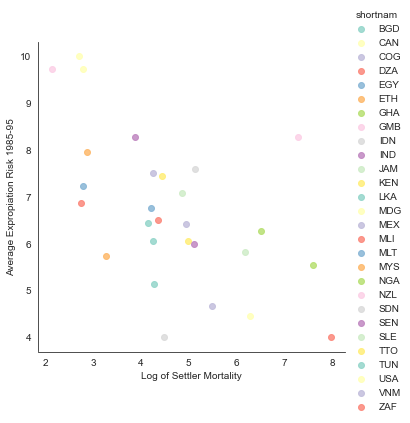

In [87]:
sns.set_style("white")
gridobj = sns.lmplot(x="Log of Settler Mortality", y="Average Expropiation Risk 1985-95", 
                     data=BD, 
                     robust=True, 
                     palette='Set3', 
                    hue = "shortnam",)
plt.show()

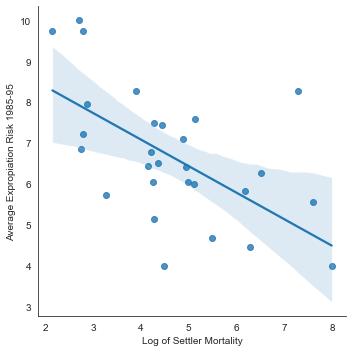

In [88]:
sns.set_style("white")
gridobj = sns.lmplot(x="Log of Settler Mortality", y="Average Expropiation Risk 1985-95", 
                     data=BD, 
                     robust=True, 
                     palette='Set3',)
plt.show()

#### interpretation: The graphic shows an interesting and quite contrary to the common knowledge implication: although colonized countries with highest GDP, as Canada or USA, have shown the lowest settler mortality rate, also present the highest average expropriation risk. To understand this pattern, the likely protectionist policies of these countries during the selected period must be analyzed. Another interesting tendence is the one linked with the poorest countries: have shown higher rates of settler mortality and lowest rates of average expropriation risk. 

### 1.2 Now you have to replicate table 2 of the paper and describe the correlations you found:

In [90]:
url_2 = "https://raw.githubusercontent.com/jesoto/1REI05/main/Reports/data/acemoglu_2001_regression.csv"
BD2 = pd.read_csv(url_2)
BD2

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
0,AFG,0,0.366667,NaN,NaN,0,1,NaN,NaN
1,AGO,1,0.136667,5.363637,7.770645,0,0,-3.411248,1.0
2,ARE,0,0.266667,7.181818,9.804219,0,1,NaN,NaN
3,ARG,0,0.377778,6.386363,9.133459,0,0,-0.872274,1.0
4,ARM,0,0.444444,NaN,7.682482,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
158,YUG,0,0.488889,6.318182,NaN,0,0,-1.203973,NaN
159,ZAF,1,0.322222,6.863637,8.885994,0,0,-1.386294,1.0
160,ZAR,1,0.000000,3.500000,6.866933,0,0,-3.411248,1.0
161,ZMB,1,0.166667,6.636363,6.813445,0,0,-2.975930,NaN


In [95]:
model_1= 'logpgp95 ~ avexpr'
result_1 = smf.ols(model_1, data = BD2).fit(cov_type='HC1')
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     334.8
Date:                Sat, 07 May 2022   Prob (F-statistic):           5.14e-35
Time:                        17:27:49   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.241     19.222      0.0

In [96]:
modelo_2= 'logpgp95 ~ avexpr + baseco==1'
result_2 = smf.ols(modelo_2, data=BD2).fit(cov_type='HC1')
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.19e-35
Time:                        17:28:19   Log-Likelihood:                -119.54
No. Observations:                 111   AIC:                             245.1
Df Residuals:                     108   BIC:                             253.2
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.7700    

In [97]:
modelo_3= 'logpgp95 ~ avexpr + lat_abst'
result_3 = smf.ols(modelo_3, data=BD2).fit(cov_type='HC1')
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.66e-35
Time:                        17:28:43   Log-Likelihood:                -118.09
No. Observations:                 111   AIC:                             242.2
Df Residuals:                     108   BIC:                             250.3
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8729      0.281     17.357      0.0

In [98]:
modelo_4= 'logpgp95 ~ avexpr + lat_abst+africa + asia + other'
result_4 = smf.ols(modelo_4, data=BD2).fit(cov_type='HC1')
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     97.09
Date:                Sat, 07 May 2022   Prob (F-statistic):           9.39e-38
Time:                        17:29:31   Log-Likelihood:                -102.45
No. Observations:                 111   AIC:                             216.9
Df Residuals:                     105   BIC:                             233.2
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8511      0.293     19.936      0.0

In [99]:
modelo_5= 'logpgp95 ~ avexpr + lat_abst+ baseco ==1'
result_5 = smf.ols(modelo_5, data=BD2).fit(cov_type='HC1')
print(result_5.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     124.5
Date:                Sat, 07 May 2022   Prob (F-statistic):           9.29e-35
Time:                        17:29:54   Log-Likelihood:                -118.06
No. Observations:                 111   AIC:                             244.1
Df Residuals:                     107   BIC:                             255.0
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.8199    

In [100]:
modelo_6= 'logpgp95 ~ avexpr + lat_abst+ africa + asia + other + baseco ==1'
result_6 = smf.ols(modelo_6, data=BD2).fit(cov_type='HC1')
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     80.49
Date:                Sat, 07 May 2022   Prob (F-statistic):           8.10e-37
Time:                        17:30:23   Log-Likelihood:                -102.43
No. Observations:                 111   AIC:                             218.9
Df Residuals:                     104   BIC:                             237.8
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.8072    

In [106]:
df_output = summary_col([result_1,result_2,result_3,result_4,result_5,result_6],stars=True)
print(df_output)


                    logpgp95 I logpgp95 II logpgp95 III logpgp95 IIII logpgp95 IIIII logpgp95 IIIIII
----------------------------------------------------------------------------------------------------
Intercept           4.6261***  4.7700***   4.8729***    5.8511***     4.8199***      5.8072***      
                    (0.2407)   (0.4288)    (0.2808)     (0.2935)      (0.4229)       (0.4312)       
R-squared           0.6113     0.6125      0.6225       0.7152        0.6227         0.7153         
R-squared Adj.      0.6078     0.6053      0.6155       0.7016        0.6121         0.6989         
africa                                                  -0.9164***                   -0.9141***     
                                                        (0.1541)                     (0.1540)       
asia                                                    -0.1531                      -0.1415        
                                                        (0.1805)                     (0.20

#### interpretation: Following the r-squared adjusted in the models with logpgp95 as dependent variable, the 4th is the most significant one. This model, with five independent variables linked with the average protection against expropriation risk as independent variable, explains 70% of the GDP variability. Therefore, the countries with higher expropriation risks are the same where higher GDP rates. Nevertheless, contrary to the first model, not all the independent variables are significant and, consequently, do not contribute to the model.

In [107]:
modelo_7= 'loghjypl ~ avexpr'
result_7 = smf.ols(modelo_7, data=BD2).fit(cov_type='HC1')
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:               loghjypl   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     230.6
Date:                Sat, 07 May 2022   Prob (F-statistic):           2.37e-28
Time:                        18:08:42   Log-Likelihood:                -115.77
No. Observations:                 108   AIC:                             235.5
Df Residuals:                     106   BIC:                             240.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8276      0.243    -19.858      0.0

In [108]:
modelo_8= 'loghjypl ~ avexpr + baseco==1'
result_8 = smf.ols(modelo_8, data=BD2).fit(cov_type='HC1')
print(result_8.summary())

                            OLS Regression Results                            
Dep. Variable:               loghjypl   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sat, 07 May 2022   Prob (F-statistic):           2.70e-29
Time:                        18:09:11   Log-Likelihood:                -115.74
No. Observations:                 108   AIC:                             237.5
Df Residuals:                     105   BIC:                             245.5
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.7790    

In [109]:
df_output_2 = summary_col([result_7, result_8],stars=True)
print(df_output_2)


                    loghjypl I loghjypl II
------------------------------------------
Intercept           -4.8276*** -4.7790*** 
                    (0.2431)   (0.3923)   
R-squared           0.5541     0.5543     
R-squared Adj.      0.5499     0.5458     
avexpr              0.4462***  0.4422***  
                    (0.0294)   (0.0404)   
baseco == 1[T.True]            -0.0357    
                               (0.1758)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## 2) Report:

Under the standard labor market theory, competitive and law-abiding, increases in minimum wages lead to higher unemployment rates by increasing the marginal cost. In this vein, the author investigates which are the effects of the minimum wage on income and employment, based on the research of five minimum wage’s increases from 2000 to 2010 in Perú. His main conclusion followed the logic of the standard labor market theory: since no determining effects of the minimum wage on employment and incomes were found, an active minimum wage policy is not a potentially effective tool to promote social inclusion. 

After a thoroughly review of the international and national literature and previous empirical studies which indicate an important heterogeneity in minimum wage effects, the author used a wide range of methodologies. And its results can be summarized as follow:  

First, descriptive analysis indicates a strong correlation between level of minimum wage and non-compliance rate. The higher the level of the minimum wage, the higher the rate of non-compliance. Therefore, minimum wage effectiveness seems doubtful in Perú, where non-compliance with labor regulations and labor informality are so high. Second, graphical analysis suggests that there is no lighthouse effect of minimum wage on incomes, measured by wages. In other words, the few identified effects tend to be limited to specific groups, as the small group of formal-sector workers. Furthermore, no significant effects on employment were found. And the few effects on informal-sector workers support the main conclusion: (dado que el salario minimo subio, se preferira pagar a trabajadores mas calificados que ya ganaban encima de la RMV pero que se les paga por su productividad marginal) 

Third, econometric analysis confirms the latter results and gives more detail explanations about them; however, from this perspective, the importance of this analysis and where lies one of paper’s strengths is the use of the “differences in differences” methodology. This method allows to establish causal relationships, not only correlations. As the Nobel winner David Card, who contrary challenged the standard theory of the impact of minimum wages concluding that a raise in it does not lead to higher unemployment rates, the author focused on analyzing a “natural experiments”: using the period of 5 increases in Perú, he established a control group, workers before the increase, and a treatment group, workers after the increase. Therefore, the paper can conclude that there is no causal relation between increase of minimum wages and an increase on employ or income.

However, an observation may be made to this conclusion: it is true that there are no significant impacts of minimum wage on income and employ, but the author arguments that, as it has said before, an active minimum wage policy is not a potentially effective tool to promote social inclusion in Perú. The main problem with this statement is that the study is focused in Lima Metropolitana, but the author provides a suggestion on public policy at national level. Nevertheless, the paper gives some insights at national level, emphasizing the particular contexts and levels of employment and income in some provinces. 

In addition to this generalization, the author does not explore at the social level the groups in which there seems to be some effect (positive or negative) of the minimum wage. For example, although he delves into the issue of young people, he does not explore the implications of the increase in the minimum wage in the groups that did see a slight improvement and those that did not. Nevertheless, this more than a weakness of the paper, is a recommendation for future researches: to analyze not only the social consequences of the increase in the minimum wage, but also to know the perspectives of citizens on their situation before and after this "natural experiment". And a second next step should be analyzing the author’s suggestion about Peruvian provinces: it will be necessary to know why the minimum wage only seems to be designed and is effective only in Lima to design new effective welfare policies.  
